# Applied Statistics Assignment - Medical costs of people- Healthcare Domain

# Task-1: Import the necessary libraries

In [55]:
#import the libraries for EDA
import numpy as np
import pandas as pd
#import libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import libraries for statistical analysis
import scipy.stats as stats # some useful stuff
from sklearn.preprocessing import LabelEncoder#For Encoding the categorical values to perform pairplot as pairplot works with Numbers

# Task-2: Read the data as a data frame

In [56]:
#file is stored in the local respositoriy
df_ins = pd.read_csv('insurance.csv')
#checking the loaded value- Default top 5 rows
print(df_ins.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# Perform basic EDA

# Shape of the data

In [19]:
print(f" Shape of the insurance data set: {df_ins.shape}\n")
total_rows=df_ins.shape[0]
total_cols=df_ins.shape[1]
print(f" Total no of rows in the dataset: {total_rows}")
print(f" Total no of the column in the dataset: {total_cols}")

 Shape of the insurance data set: (1338, 7)

 Total no of rows in the dataset: 1338
 Total no of the column in the dataset: 7


# Data type of each attribute

In [4]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observation**: The dataset contains 3 categorical variable namely sex, smoker and region others are numerical values in nature.

# Checking the presence of missing values

In [5]:
print(df_ins.isnull().values.any())

False


Total number of missing values

In [6]:
print('Total number of missing values:',df_ins.isnull().sum().sum())

Total number of missing values: 0


In [21]:
print('Total missing values for each attribute')

Total missing values for each attribute


In [20]:
print(df_ins.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# 5 point summary of numerical attributes

The five-number summary involves the calculation of 5 summary statistical quantities: namely:
1. Minimum: The smallest observation in the sample.
2. 1st Quartile: The 25th percentile.
3. Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.
4. 3rd Quartile: The 75th percentile.
5. Maximum: The largest observation in the sample.

In [8]:
df_5pt_summ=df_ins.describe().T
df_5pt_summ

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
#5 point summary can also be retrieved using the below program
for i in df_ins.describe().columns:
    print('5 point summary of attributes:',i)
    print('min:',round(df_ins[i].describe().loc['min'],3))
    print('IQR 1:',round(df_ins[i].describe().loc['25%'],3))
    print('Median:',round(df_ins[i].describe().loc['50%'],3))
    print('IQR 3:',round(df_ins[i].describe().loc['75%'],3))
    print('max:',round(df_ins[i].describe().loc['max'],3))
    print('\n')

5 point summary of attributes: age
min: 18.0
IQR 1: 27.0
Median: 39.0
IQR 3: 51.0
max: 64.0


5 point summary of attributes: bmi
min: 15.96
IQR 1: 26.296
Median: 30.4
IQR 3: 34.694
max: 53.13


5 point summary of attributes: children
min: 0.0
IQR 1: 0.0
Median: 1.0
IQR 3: 2.0
max: 5.0


5 point summary of attributes: charges
min: 1121.874
IQR 1: 4740.287
Median: 9382.033
IQR 3: 16639.913
max: 63770.428




# Distribution of ‘bmi’, ‘age’ and ‘charges’ column

Sometimes it is helpful to compare different views of data side by side. To this end, Matplotlib has the concept of subplots: groups of smaller axes that can exist together within a single figure. These subplots might be insets, grids of plots, or other more complicated layouts.

**Distribution of ‘bmi’, ‘age’ and ‘charges’ columns using distplot**

Text(0, 0.5, 'freq')

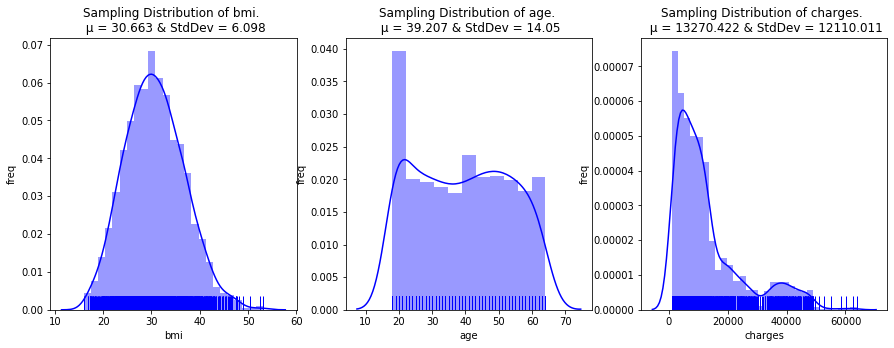

In [40]:
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.distplot(df_ins['bmi'],kde=True, rug=True, color='blue')
plt.title(f"Sampling Distribution of bmi. \n \u03bc = {round(df_ins['bmi'].describe().loc['mean'], 3)} & StdDev = {round(df_ins['bmi'].describe().loc['std'],3)}")
plt.xlabel('bmi')
plt.ylabel('freq')
plt.subplot(1,3,2)
sns.distplot(df_ins['age'],kde=True, rug=True, color='blue')
plt.title(f"Sampling Distribution of age. \n \u03bc = {round(df_ins['age'].describe().loc['mean'], 3)} & StdDev = {round(df_ins['age'].describe().loc['std'],3)}")
plt.xlabel('age')
plt.ylabel('freq')
plt.subplot(1,3,3)
sns.distplot(df_ins['charges'],kde=True, rug=True, color='blue')
plt.title(f"Sampling Distribution of charges. \n \u03bc = {round(df_ins['charges'].describe().loc['mean'], 3)} & StdDev = {round(df_ins['charges'].describe().loc['std'],3)}")
plt.xlabel('charges')
plt.ylabel('freq')

**Distribution of ‘bmi’, ‘age’ and ‘charges’ columns using histogram**

Text(0.5, 0, 'charges')

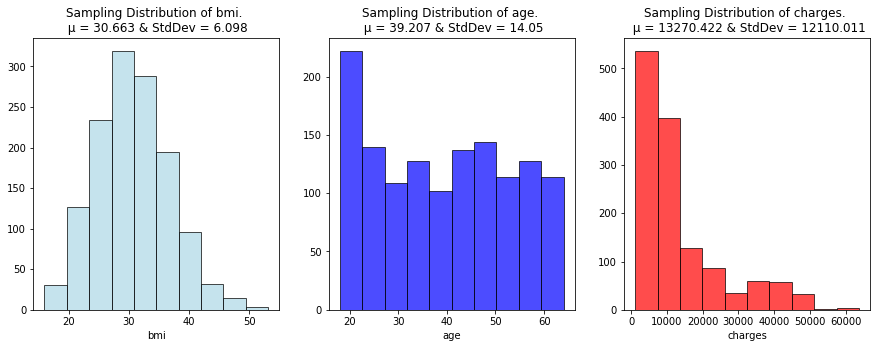

In [37]:
#Distribution of ‘bmi’, ‘age’ and ‘charges’ columns using histogram
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
plt.hist(df_ins['bmi'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.title(f"Sampling Distribution of bmi. \n \u03bc = {round(df_ins['bmi'].describe().loc['mean'], 3)} & StdDev = {round(df_ins['bmi'].describe().loc['std'],3)}")
plt.xlabel('bmi')
plt.subplot(1,3,2)
plt.hist(df_ins['age'], color='blue', edgecolor = 'black', alpha = 0.7)
plt.title(f"Sampling Distribution of age. \n \u03bc = {round(df_ins['age'].describe().loc['mean'], 3)} & StdDev = {round(df_ins['age'].describe().loc['std'],3)}")
plt.xlabel('age')
plt.subplot(1,3,3)
plt.hist(df_ins['charges'], color='red', edgecolor = 'black', alpha = 0.7)
plt.title(f"Sampling Distribution of charges. \n \u03bc = {round(df_ins['charges'].describe().loc['mean'], 3)} & StdDev = {round(df_ins['charges'].describe().loc['std'],3)}")
plt.xlabel('charges')


**The above distribution represents:**
    1. bmi looks normally distributed
    2. Age seems be be uniformly distributed 
    3. charges are highly right skewed

# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [29]:
#Lets first create a subset of the data from the data frame comtaining the bmi, age and charges column to measure the skewness
sub_df_ins=df_ins[['age','bmi','charges']]
sub_df_ins.skew(axis = 0, skipna = True) 

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

**Interpretation, of the above skewness**
1. age is Normally distributed
2. bmi is close to normal distribution, from the histogram/distplot it looks like there are some outlier value which causing its distribution not Normal
3. charges are having positive skewness and right tailed distribution

# Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [31]:
#for detecting outlier defined a function with data as input and then calculate the outlier values
def find_outliers(data):
    outlier_data=[]
    for i in data:
        outlier_data=[]
        stat=data[i].describe()
        min=stat.loc['min']
        Q1=stat.loc['25%']
        median=stat.loc['50%']
        Q3=stat.loc['75%']
        max=stat.loc['max']
        IQR=Q3-Q1
        #print(min,Q1,median,Q3,max,IQR)
        for j in data[i]:
            #print('Second iteration j val:',j)
            #print('Second iteration j:',j)
            if(j < (Q1 - 1.5 * IQR)):
                #print('out lier values',i,j,Q1,Q3,IQR)
                outlier_data.append(j)
                
            if(j > (Q3 + 1.5 * IQR)):
                #print('out lier values',i,j,Q1,Q3,IQR)
                outlier_data.append(j)

        print('Outliers data for',i,':',len(outlier_data))
        print(outlier_data)
        print('\n')
    return
out_data=find_outliers(sub_df_ins)

Outliers data for age : 0
[]


Outliers data for bmi : 9
[49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]


Outliers data for charges : 139
[39611.7577, 36837.467000000004, 37701.8768, 38711.0, 35585.576, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45, 43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457, 47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545, 46151.1245, 42856.837999999996, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 34838.873, 35491.64, 42760.5022, 47928.03, 48517.56315, 41919.097, 36085.219, 38126.2465, 42303.69215, 46889.2612, 46599.1084, 39125.33225, 37079.372, 35147.52848, 48885.135610000005, 36197.699, 38245.59327, 48675.5177, 63770.42801, 45863.205, 39983.42595, 45702.02235, 58571.074479999996, 43943.8761, 39241.442, 42969.8527, 40182.246, 34617.84065, 42983.4585, 42560.4304, 400

**The Outlier Data is also validated with BoxPllot**

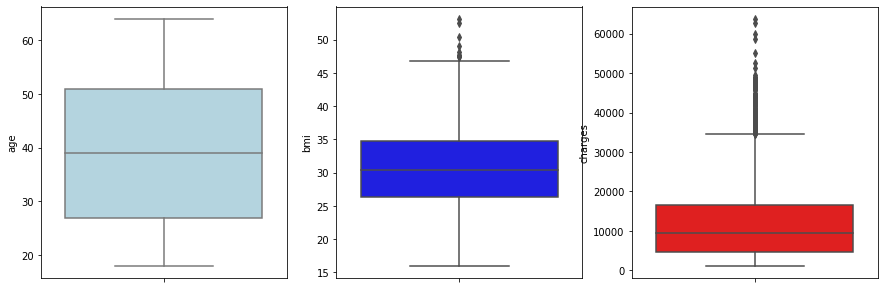

In [36]:
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.boxplot(sub_df_ins['age'], orient='vertical',color='lightblue')
plt.subplot(1,3,2)
sns.boxplot(sub_df_ins['bmi'], orient='vertical',color='blue')
plt.subplot(1,3,3)
sns.boxplot(sub_df_ins['charges'], orient='vertical',color='red')

**Interpretation, of the above skewness**
1. Age has zero outliers
2. bmi has a few extreme values(outliers)
3. charges is highly skewed, there are quiet a lot of extreme values(outliers)

# Distribution of categorical columns (include children)

seaborn used to plot categorical data in various forms as given below:

1. barplot
2. countplot
3. boxplot
4. violinplot
5. striplot
6. swarmplot

Insurance data has the following 3 categories
1. sex
2. smoker
3. region

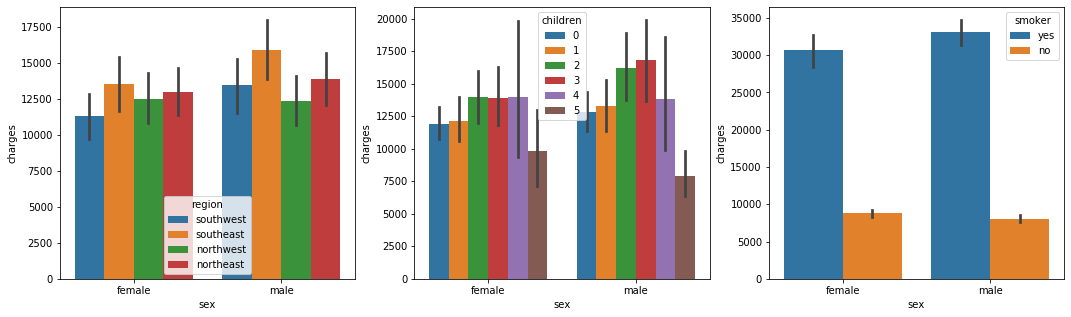

In [41]:
plt.figure(figsize= (18,5))
plt.subplot(1,3,1)
sns.barplot(x='sex',y='charges',data=df_ins,hue='region')
plt.subplot(1,3,2)
sns.barplot(x='sex',y='charges',data=df_ins,hue='children')
plt.subplot(1,3,3)
sns.barplot(x='sex',y='charges',data=df_ins,hue='smoker')

**Interpretation of the above**
    1. Charges are a lot more for smokers than non-smokers even for Male/Female in the data
    2. Charges are different accross all regions either for Male/Female Sex
    3. Charges are distributed among Male/Female and varies along with children

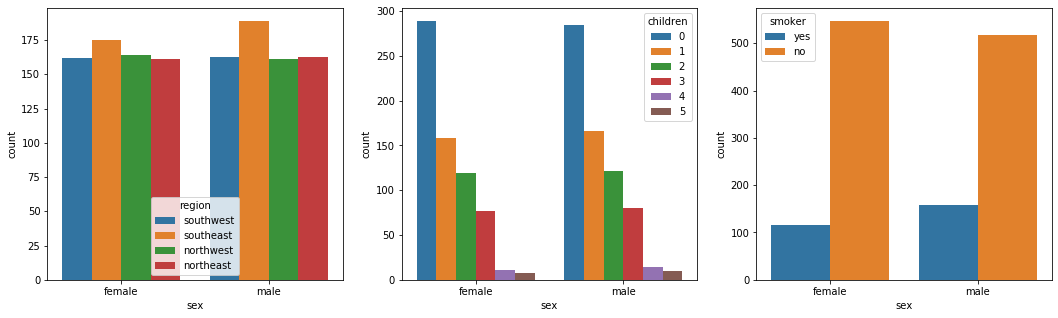

In [42]:
plt.figure(figsize= (18,5))
plt.subplot(1,3,1)
sns.countplot(x='sex',data=df_ins,hue='region')
plt.subplot(1,3,2)
sns.countplot(x='sex',data=df_ins,hue='children')
plt.subplot(1,3,3)
sns.countplot(x='sex',data=df_ins,hue='smoker')

**Interpretation of the above**
    1. There are a lot more non-smokers than there are smokers in the data and distribution by sex also similar nature
    2. Southeast region has maximum Male/Female accross other regions
    3. Male/Female count is more for no childrent(0), and less for age of child 4 or 5, maximum in between 1-3

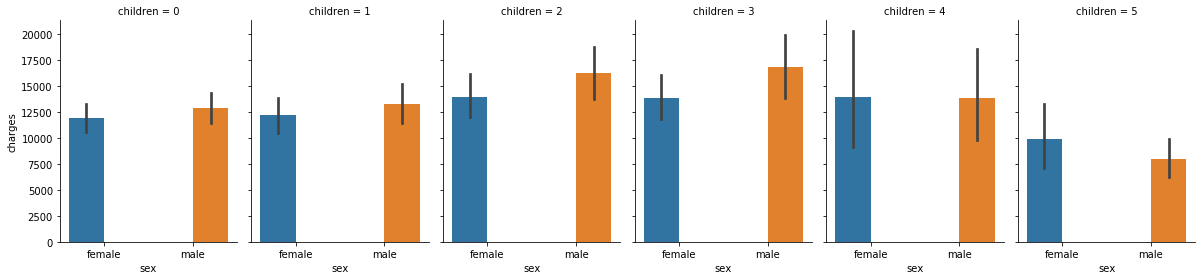

In [18]:
sns.catplot(x="sex", y="charges",hue="sex", col="children",data=df_ins, kind="bar",height=4, aspect=.7)

**Interpretation of the above**
    1. Charges for Male/Female is also distributed evenly, along with children
    2. Most Charges for Male/Female high with 2 children and very less for 5 children

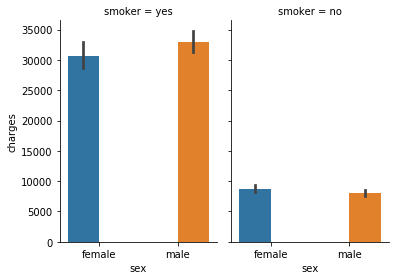

In [19]:
sns.catplot(x="sex", y="charges",hue="sex", col="smoker",data=df_ins, kind="bar",height=4, aspect=.7)

**Interpretation of the above**
    1. Charges are a lot more for smokers than non-smokers even for Male/Female in the data

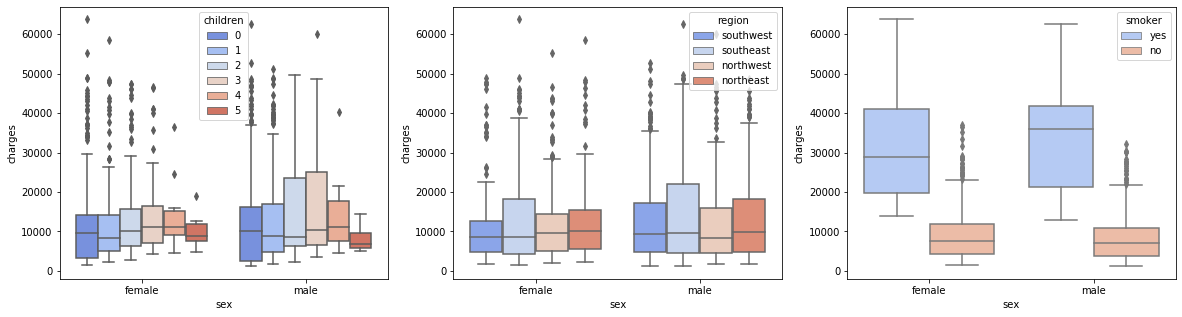

In [46]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
sns.boxplot(x="sex",y="charges",hue="children",data=df_ins, palette="coolwarm")
plt.subplot(1,3,2)
sns.boxplot(x="sex",y="charges",hue="region",data=df_ins, palette="coolwarm")
plt.subplot(1,3,3)
sns.boxplot(x="sex",y="charges",hue="smoker",data=df_ins, palette="coolwarm")

**Interpretation of the above**
    1. Charges are a lot more for smokers than non-smokers even for Male/Female in the data
    2. Charges are distributed evenly accross all regions even for Male/Female Sex
    3. Charges are distributed evenly among Male/Female and varies along with children

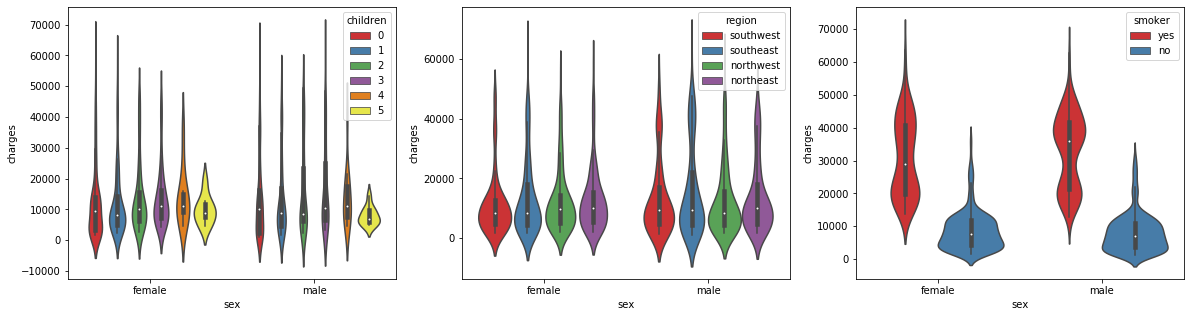

In [45]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
sns.violinplot(x="sex",y="charges",data=df_ins,hue='children',palette='Set1')
plt.subplot(1,3,2)
sns.violinplot(x="sex",y="charges",data=df_ins,hue='region',palette='Set1')
plt.subplot(1,3,3)
sns.violinplot(x="sex",y="charges",data=df_ins,hue='smoker',palette='Set1')

**Interpretation of the above**
    1. Charges are a lot more for smokers than non-smokers even for Male/Female in the data
    2. Charges are distributed evenly accross all regions even for Male/Female Sex
    3. Charges are distributed evenly among Male/Female and varies along with children

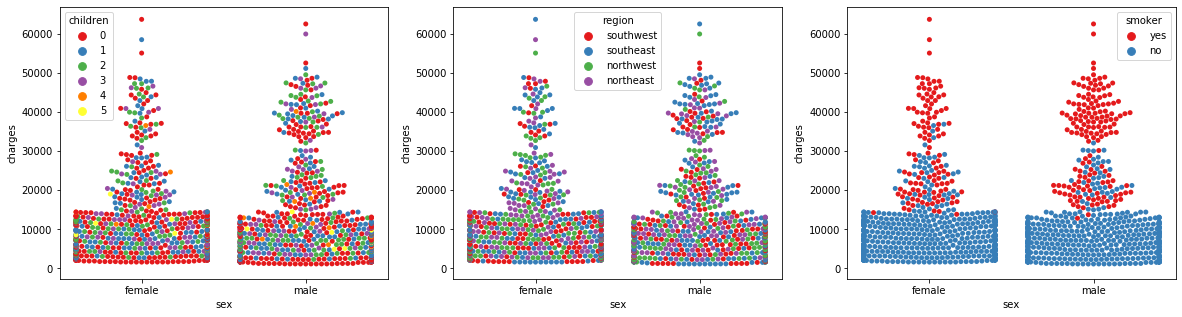

In [44]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
sns.swarmplot(x="sex", y="charges", data=df_ins,hue='children',palette='Set1')
plt.subplot(1,3,2)
sns.swarmplot(x="sex", y="charges", data=df_ins,hue='region',palette='Set1')
plt.subplot(1,3,3)
sns.swarmplot(x="sex", y="charges", data=df_ins,hue='smoker',palette='Set1')

**Interpretation of the above**
    1. Charges are a lot more for smokers than non-smokers even for Male/Female in the data
    2. Charges are distributed evenly accross all regions even for Male/Female Sex
    3. Charges are distributed evenly among Male/Female and varies along with children

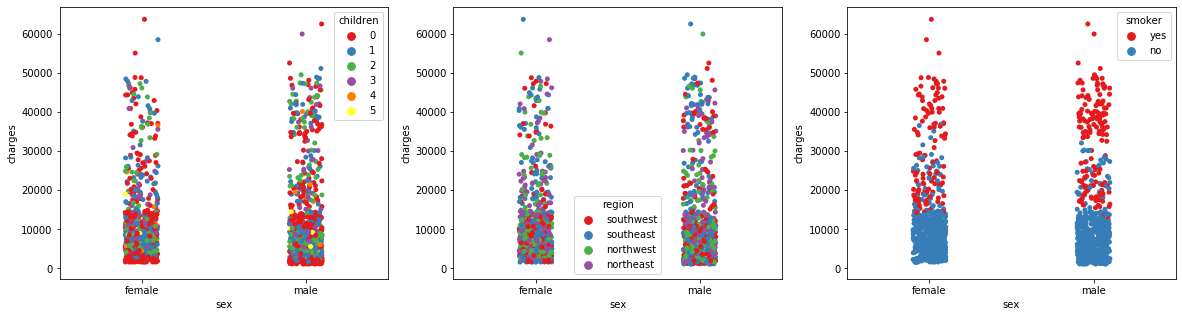

In [43]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
sns.stripplot(x="sex",y="charges",data=df_ins,jitter=True,hue='children',palette='Set1')
plt.subplot(1,3,2)
sns.stripplot(x="sex",y="charges",data=df_ins,jitter=True,hue='region',palette='Set1')
plt.subplot(1,3,3)
sns.stripplot(x="sex",y="charges",data=df_ins,jitter=True,hue='smoker',palette='Set1')

**Interpretation of the above**
    1. Charges are a lot more for smokers than non-smokers even for Male/Female in the data
    2. Charges are distributed evenly accross all regions even for Male/Female Sex
    3. Charges are distributed evenly among Male/Female and varies along with children

# The default pairs plot in seaborn only plots numerical columns, with adding hue we can display the distribution of categorical value within the chart

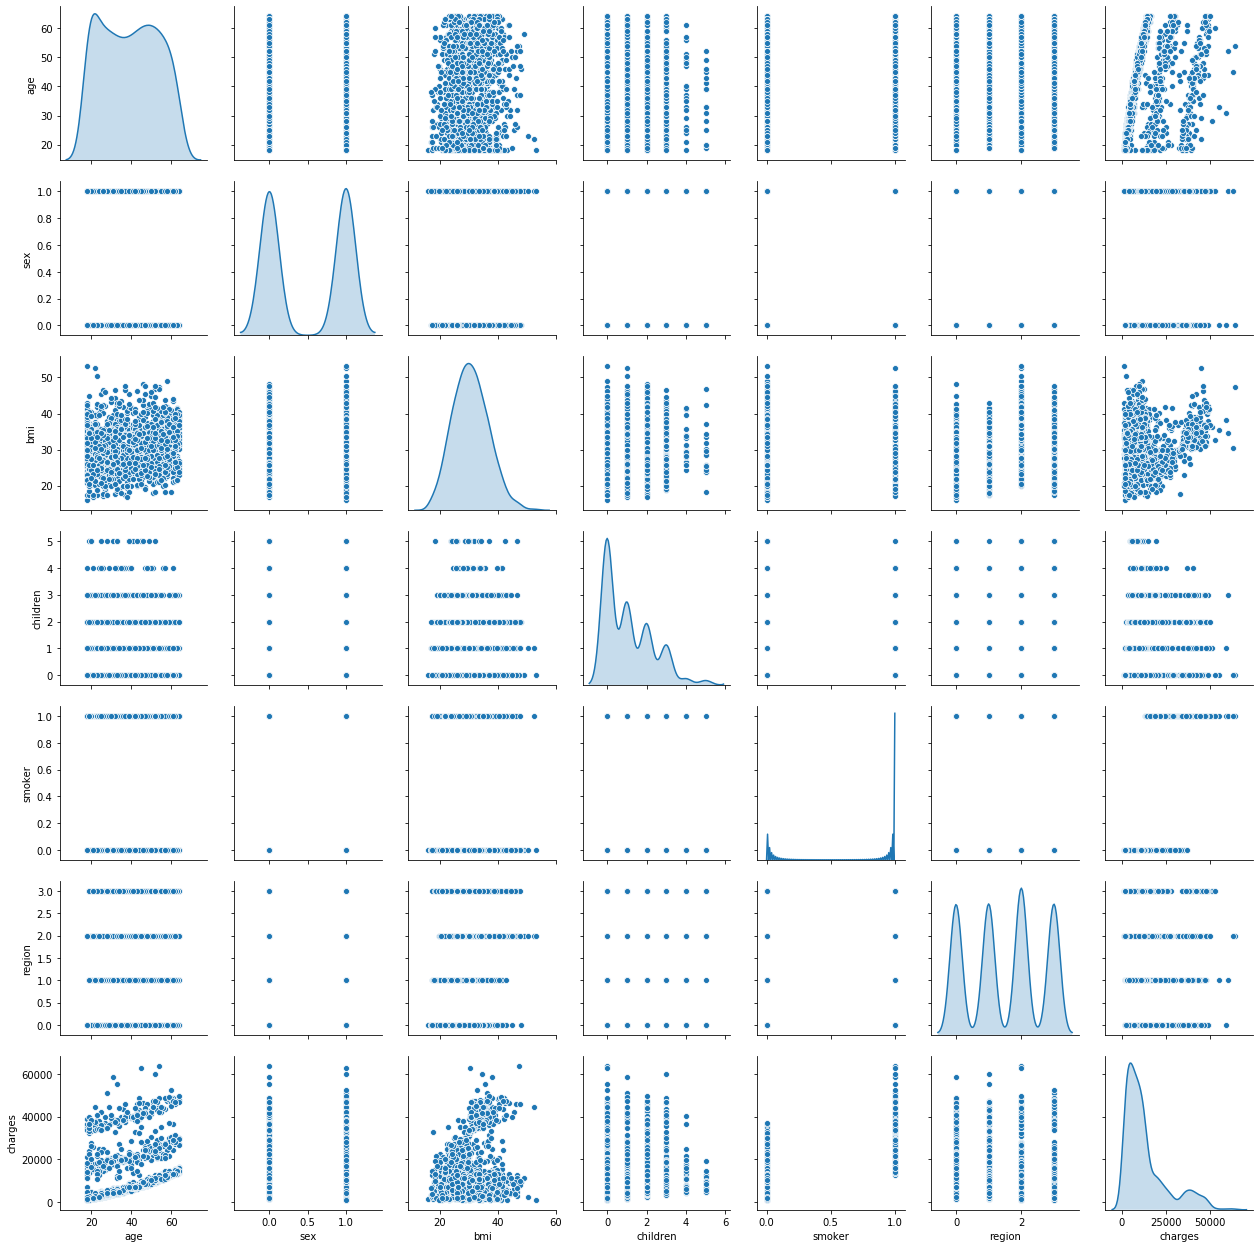

In [54]:
#Label encoding the categorical variables before doing a pairplot because pairplot ignores strings
df_ins_copy = df_ins[:]
df_ins_copy.loc[:,['sex', 'smoker', 'region']] = df_ins_copy.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(df_ins_copy,diag_kind='kde')  #pairplot

**Interpretation of the above:**
1. There's a correlation  between 'age' and 'charges, older people are charged more than the younger ones
2. smokers claimed more money than non-smokers
3. There is obvious correlation of 'charges' is with 'smoker'
4. There's a correlation  between 'children' and 'charges, no or upto 3 children are charged more than with 4 chilren, and minimal charges with 5 children
5. Region wise charges having not much significant difference
6. bmi and age does not looks to be having a corelation

# Do charges of people who smoke differ significantly from the people who don't?

Lets first findout the dependency between attributes smoker and charges accross different sex/age using various plot
1. barplot
2. boxplot
3. swarn plot
4. violin plot
5. stripplot 

or with 
1. Scatter plot

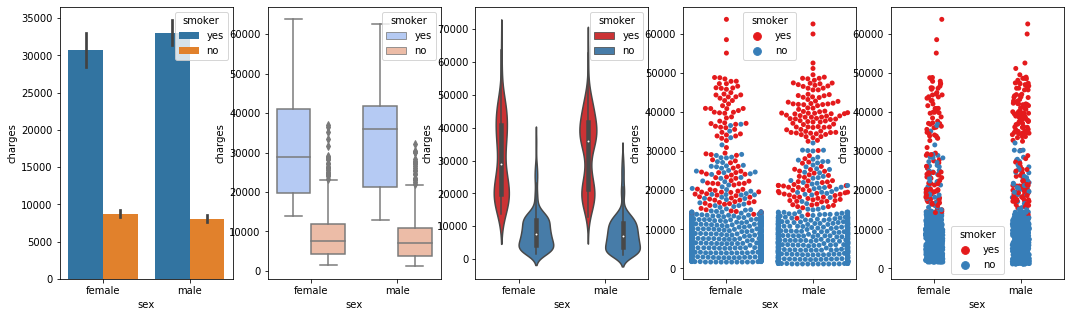

In [51]:
plt.figure(figsize= (18,5))
plt.subplot(1,5,1)
sns.barplot(x='sex',y='charges',data=df_ins,hue='smoker')
plt.subplot(1,5,2)
sns.boxplot(x="sex",y="charges",hue="smoker",data=df_ins, palette="coolwarm")
plt.subplot(1,5,3)
sns.violinplot(x="sex",y="charges",data=df_ins,hue='smoker',palette='Set1')
plt.subplot(1,5,4)
sns.swarmplot(x="sex", y="charges", data=df_ins,hue='smoker',palette='Set1')
plt.subplot(1,5,5)
sns.stripplot(x="sex",y="charges",data=df_ins,jitter=True,hue='smoker',palette='Set1')

**Interpretation:** There is a s ignificant impact of Smoker and Non Smoker on the above charges whether it is by Sex

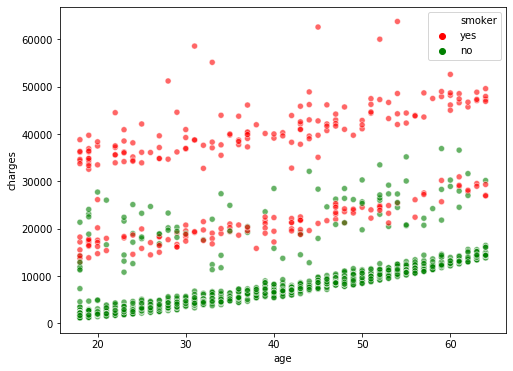

In [30]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df_ins.age, df_ins.charges,hue=df_ins.smoker,palette= ['red','green'] ,alpha=0.6)

**Interpretation:** There is a s ignificant impact of Smoker and Non Smoker on the above charges as the age grows

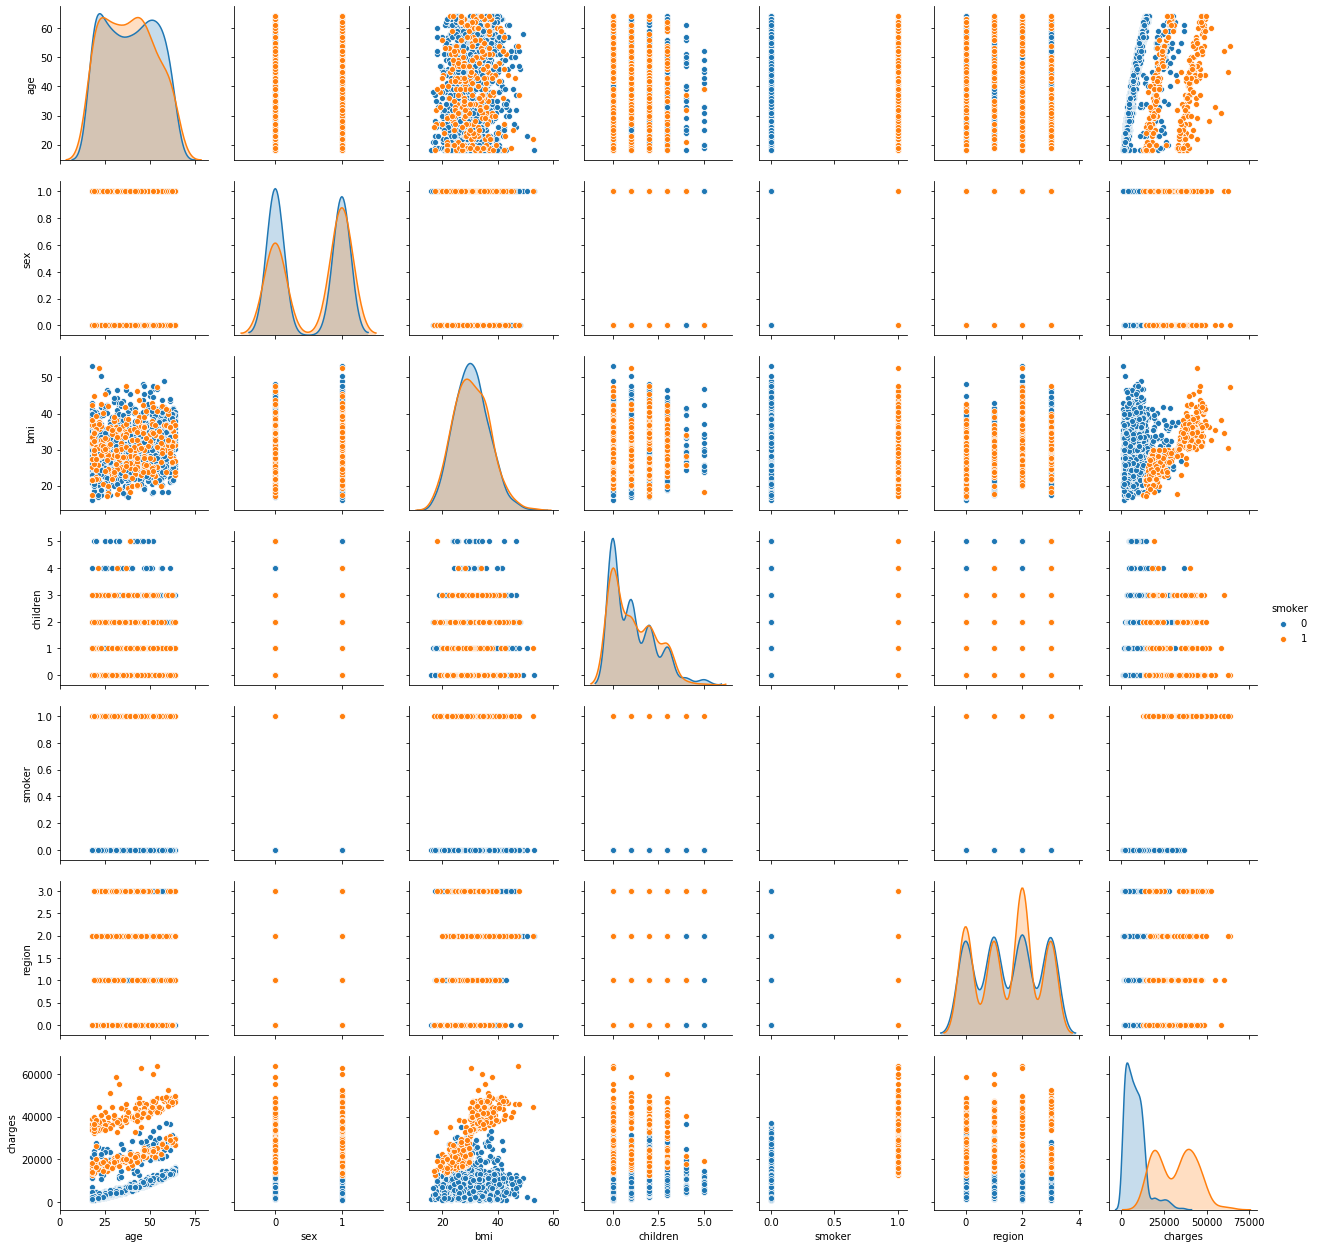

In [49]:
#pair plot by smoker
sns.pairplot(df_ins_copy, hue='smoker')

**Intepretation:** From all the above chart it is very much clear that there is direct dependency on charges based on smoker whether it is male/female population with or without children, or by age of population

## Now, lets validate the same with hypothetical testing in statistics

## Framework for Statistical Hypothesis Testing with T-Tests
* Do you have one sample that you want to compare to some spcified value? Do a **one-sample t-test**. For example, let's say it is well known that acorns have an average mass of 10 g, and you want to test to see if them mass of acorns from a forest subjected to acid rain are signifcantly different. 
* Do you have two independent samples that you want to compare to each other? Do an **independent samples t-test**. For example, let's say you take samples of acorn from a forest upwind and downwind from a coal power plant and you want to test to see if the average mass of the acorns from the two samples is the same.
* Do you have two dependent samples taken from the same indidividuals or objects? Do a **paired samples t-test**. For example, let's say you measure the average mass of acorns from 50 trees in a forest before and after the local power plant converted from coal to natural gas and want to see if there is a difference in the masses pre-conversion to post-conversion. 

In [31]:
# T-test to check dependency of smoking on charges
# Stating the Null and Alternate Hypothesis
Ho = "smoker and non-smoker have same Charges"   
Ha = "smoker and non-smoker Charges are not the same"   

# sample of charges for smoker
x1 = np.array(df_ins[df_ins.smoker == 'yes'].charges)

# sample of charges for non-smoker
x2 = np.array(df_ins[df_ins.smoker == 'no'].charges)

# a two-sample independent t-test is done with scipy as follows
# NOTE: the p-value given is two-sided so the one-sided p value would be p/2
t, p_twosided = stats.ttest_ind(x2, x1, equal_var=True)

print("t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)
print('\n')

print('Conclusion:')
if p_twosided < 0.05:  # Setting our significance level at 5%
    print(f'**{Ha}** as the p_value ({p_twosided}) < 0.05')
else:
    print(f'**{Ho}** as the p_value ({p_twosided}) > 0.05')


t =  -46.664921172723716 , p_twosided =  8.271435842177219e-283 , p_onesided = 4.1357179210886093e-283


Conclusion:
**smoker and non-smoker Charges are not the same** as the p_value (8.271435842177219e-283) < 0.05


# Does bmi of males differ significantly from that of females?

Lets first findout the dependency between attributes smoker and charges accross different sex/age using various plot
1. barplot
2. boxplot
3. swarn plot
4. violin plot
5. stripplot 

or with 
1. Scatter plot

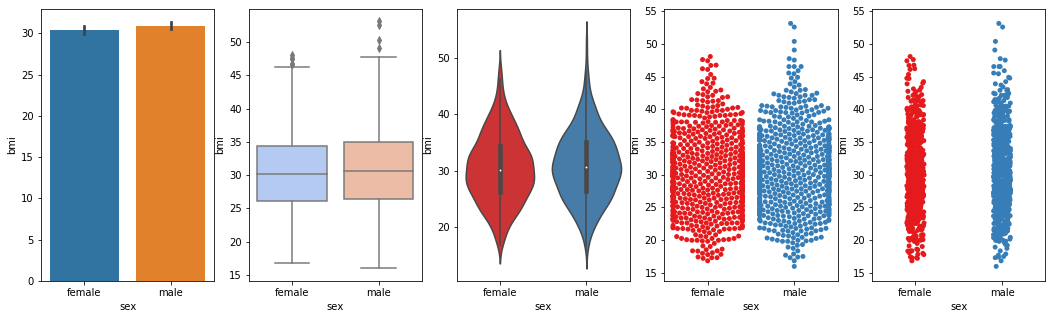

In [32]:
plt.figure(figsize= (18,5))
plt.subplot(1,5,1)
sns.barplot(x='sex',y='bmi',data=df_ins)
plt.subplot(1,5,2)
sns.boxplot(x="sex",y="bmi",data=df_ins, palette="coolwarm")
plt.subplot(1,5,3)
sns.violinplot(x="sex",y="bmi",data=df_ins,palette='Set1')
plt.subplot(1,5,4)
sns.swarmplot(x="sex", y="bmi", data=df_ins,palette='Set1')
plt.subplot(1,5,5)
sns.stripplot(x="sex",y="bmi",data=df_ins,jitter=True,palette='Set1')

There is no relation between gender and bmi, as it is almost the same from the above representation

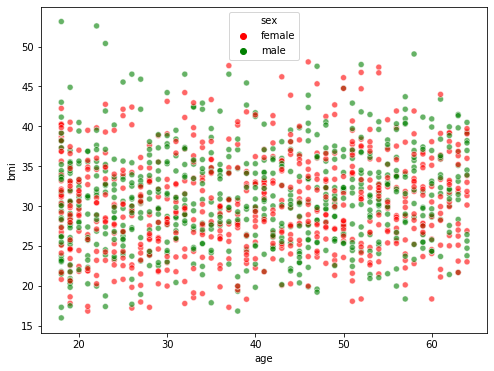

In [33]:
#Scatter plot to look for visual evidence of bmi dependency between attributes male and female accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df_ins.age, df_ins.bmi,hue=df_ins.sex,palette= ['red','green'] ,alpha=0.6)

There is no relation between gender and bmi, as the co-relation pattern is looks to be zero here

# Now, lets validate the same with hypothetical testing in statistics

In [34]:
# T-test to check dependency of smoking on charges
# Stating the Null and Alternate Hypothesis
Ho = "male and female have same bmi"   
Ha = "male and female bmi are not the same"   

# sample of charges for smoker
x1 = np.array(df_ins[df_ins.sex == 'male'].bmi)

# sample of charges for non-smoker
x2 = np.array(df_ins[df_ins.sex == 'female'].bmi)

# a two-sample independent t-test is done with scipy as follows
# NOTE: the p-value given is two-sided so the one-sided p value would be p/2
t, p_twosided = stats.ttest_ind(x2, x1, equal_var=True)

print("t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)
print('\n')

print('Conclusion:')
if p_twosided < 0.05:  # Setting our significance level at 5%
    print(f'**{Ha}** as the p_value ({p_twosided}) < 0.05')
else:
    print(f'**{Ho}** as the p_value ({p_twosided}) > 0.05')

t =  -1.696752635752224 , p_twosided =  0.08997637178984932 , p_onesided = 0.04498818589492466


Conclusion:
**male and female have same bmi** as the p_value (0.08997637178984932) > 0.05


# Is the proportion of smokers significantly different in different genders?

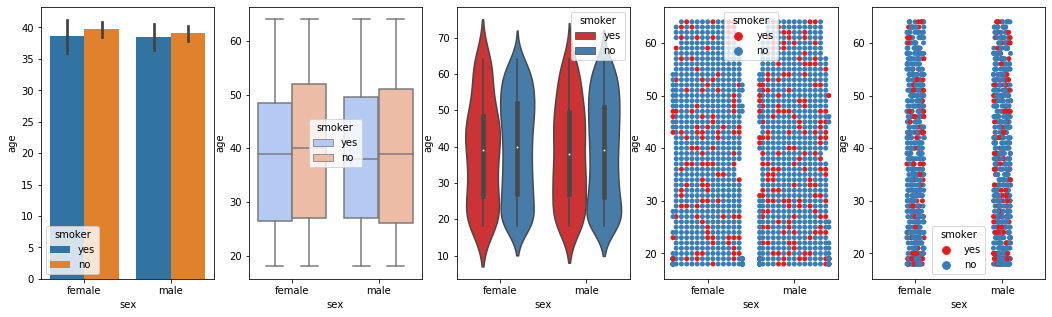

In [35]:
plt.figure(figsize= (18,5))
plt.subplot(1,5,1)
sns.barplot(x='sex',y='age',data=df_ins,hue='smoker')
plt.subplot(1,5,2)
sns.boxplot(x="sex",y="age",hue="smoker",data=df_ins, palette="coolwarm")
plt.subplot(1,5,3)
sns.violinplot(x="sex",y="age",data=df_ins,hue='smoker',palette='Set1')
plt.subplot(1,5,4)
sns.swarmplot(x="sex", y="age", data=df_ins,hue='smoker',palette='Set1')
plt.subplot(1,5,5)
sns.stripplot(x="sex",y="age",data=df_ins,jitter=True,hue='smoker',palette='Set1')

From the above visual representation it is to some extent clear that the gender has an impact on the smoking habit

# Lets validate it with statistical analysis

In [36]:
# Chi_square test to check if smoking habits are different for different genders
# Stating the Null and Alternate Hypothesis
Ho = "Gender has no effect on smoking habits"  
Ha = "Gender has an effect on smoking habits"   

# Contingency table of sex and smoker attributes
crosstab = pd.crosstab(df_ins['sex'],df_ins['smoker'])
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


**Proportion of smokers in males is significantly different from that of the females**

# Is the distribution of bmi across women with no children, one child and two children, the same?

In [38]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


df_female=df_ins[df_ins['sex'] == 'female']
zero = df_female[df_female.children == 0]['bmi']
one = df_female[df_female.children == 1]['bmi']
two = df_female[df_female.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05


**BMI is not changed by the number of children a women has**